## 1. Svd


In [1]:
import numpy as np
from sklearn.utils.extmath import randomized_svd as svd
from sklearn.cluster import SpectralClustering as SC
from sklearn.mixture import GaussianMixture as Gauss
from sklearn.cluster import AffinityPropagation as AP
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import rand_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 1. how to choose d in svd, how do I know it's good or bad
# 2. how to compare interms of results, MSE but labbing assumptions
# 2. why in some method embeded data seems give worse approx
# 3. overfitting problem in AffinityPropagation, or just bad choice of algorithm

In [3]:
# read files
with open('adjacency.txt') as file:
    lines = file.readlines()

with open('mp_labels.txt') as file:
    lines_2 = file.readlines()

with open('parties.txt') as file:
    lines_3 = file.readlines()



In [4]:
k = [a[:-1] for a in lines_2]
'10' in k

True

In [5]:
# find Oliver Dowden, row number starts from 1 and include the title
# con Oliver Dowden, lab Debbie	Abrahams, snp Hannah Bardell, LDem Alistair Carmichael, DUP Carla Lockhart
# SF Mickey, Independent Margaret, PC, SDLP, Alba, SPK Lindsay, Green Caroline, Alliance Stephen Farry
with open('mps.txt',"r",encoding="utf-8") as a_file:
    for row_number, line in enumerate(a_file, start=1):
        if 'Farry' in line:
            print(row_number)

210


In [6]:
examplar = {'con':174, 'lab': 1, 'snp': 32, 'pc': 659, 'SDLP': 186, 'Alba':280, 'LDem': 95, 'DUP': 391, 'SF': 62, 
            'Independent': 212, 'SPK': 319, 'Green':400, 'Alliance': 208 }

In [7]:
A = []
for line in lines:
    line = line.split()
    line = [int(a) for a in line]
    A.append(line)

t_labels = [int(a[:-1]) for a in lines_2]
t_labels = np.array(t_labels)

parties = [a[:-1] for a in lines_3]

In [8]:
#obtain the raw adjacency matrix
A = np.array(A)
A.shape #The shape is correct

(674, 794)

In [9]:
U, S, Vh = svd(A, 600) # not sure 600 is a good number 
S = np.diag(S)
U.shape, S.shape, Vh.shape

((674, 600), (600, 600), (600, 794))

In [10]:
X = U@S**(0.5)
Y = S**(0.5)@Vh
X.shape, Y.shape

((674, 600), (600, 794))

In [11]:
li_1 = []
for a in range(1,677):
    U, S, Vh = svd(A, a)
    S = np.diag(S)
    X_ = U@S**(0.5)
    result = Gauss(n_components=13, random_state=100
                  ).fit_predict(X_)
    li_1.append(rand_score(t_labels,result))

KeyboardInterrupt: 

Text(0.5, 1.0, 'optimization SVD untruncated using GMM')

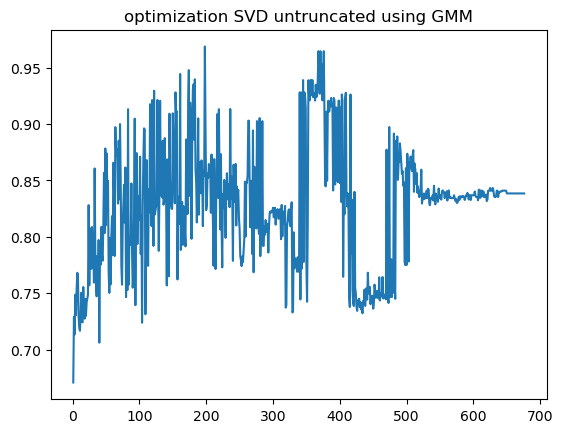

In [ ]:
plt.plot(range(1,677), li_1)
plt.title('optimization SVD untruncated using GMM')

In [ ]:
print(max(li))
inde = li.index(max(li))
dex = [a for a in range(1,677)]
dex[inde]

0.9686862050872792


196

In [ ]:
li_2 = []
for a in range(1,677):
    U, S, Vh = svd(A, a)
    S = np.diag(S)
    X_ = U@S**(0.5)
    result = SC(n_clusters=13, n_components=13, random_state=100
                  ).fit_predict(X_)
    li_2.append(rand_score(t_labels,result))

/Users/eliashanlm/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/eliashanlm/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/eliashanlm/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


Text(0.5, 1.0, 'optimization of SVD untruncated using spectal clustering')

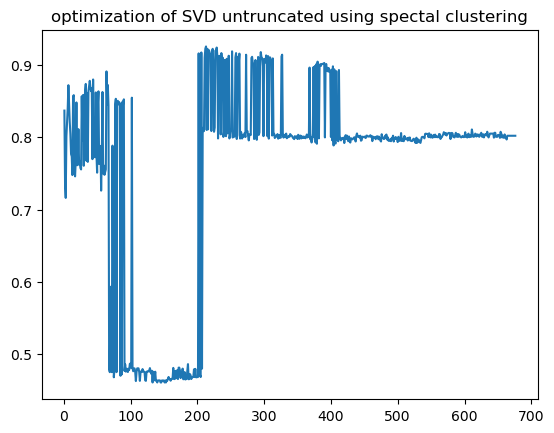

In [ ]:
plt.plot(range(1,677), li_2)
plt.title('optimization of SVD untruncated using spectal clustering')

In [ ]:
print(max(li))
inde = li.index(max(li))
dex = [a for a in range(1,677)]
dex[inde]

0.9686862050872792


196

## Data truncation


In [22]:
remo = []
for i in range(0,674):
    if t_labels[i] > 4:
        remo.append(i)
len(remo)

25

In [23]:
A_1 = np.delete(A, remo, 0)
A_1.shape # now cluster into 6

(649, 794)

In [24]:
t_labels_1 = np.delete(t_labels, remo, 0)
t_labels_1.shape

(649,)

In [25]:
U, S, Vh = svd(A_1, 2) # not sure 600 is a good number 
S = np.diag(S)
X_1 = U@S**(0.5)

### optimization again

In [17]:
li_3 = []
for a in range(2,600):
    U, S, Vh = svd(A_1, a)
    S = np.diag(S)
    X_ = U@S**(0.5)
    print(X_.shape)
    result = SC(n_clusters=6, n_components=6, random_state=100
                  ).fit_predict(X_)
    li_3.append(rand_score(t_labels_1,result))

(656, 2)
(656, 3)
(656, 4)
(656, 5)
(656, 6)
(656, 7)
(656, 8)
(656, 9)
(656, 10)
(656, 11)
(656, 12)
(656, 13)
(656, 14)
(656, 15)
(656, 16)
(656, 17)
(656, 18)
(656, 19)
(656, 20)
(656, 21)
(656, 22)
(656, 23)
(656, 24)
(656, 25)
(656, 26)
(656, 27)
(656, 28)
(656, 29)
(656, 30)
(656, 31)
(656, 32)
(656, 33)
(656, 34)
(656, 35)
(656, 36)
(656, 37)
(656, 38)
(656, 39)
(656, 40)
(656, 41)
(656, 42)
(656, 43)
(656, 44)
(656, 45)
(656, 46)
(656, 47)


KeyboardInterrupt: 

0.9656395457084341


61

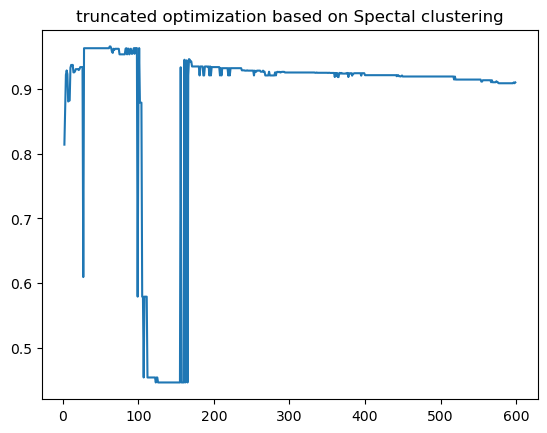

In [ ]:
plt.plot(range(2,600), li_3)
plt.title('truncated optimization based on Spectal clustering')
print(max(li_3))
inde = li_3.index(max(li_3))
dex = [a for a in range(1,677)]
dex[inde]

In [ ]:
li_4 = []
for a in range(1,677):
    U, S, Vh = svd(A_1, a)
    S = np.diag(S)
    X_ = U@S**(0.5)
    print(a)
    result = Gauss(n_components=6, random_state=100
                  ).fit_predict(X_)
    li_4.append(rand_score(t_labels_1,result))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


0.9656395457084341


61

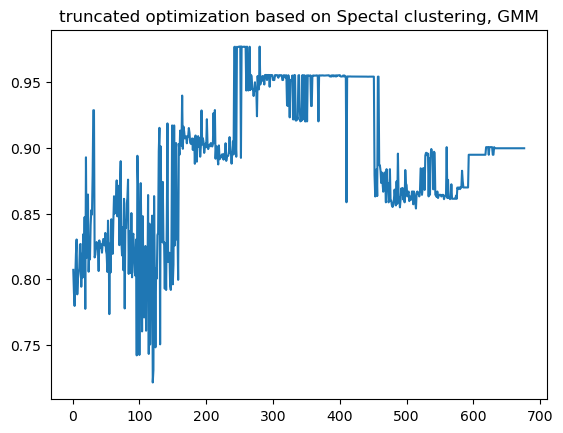

In [ ]:
plt.plot(range(1,677), li_4)
plt.title('truncated optimization based on Spectal clustering, GMM')
print(max(li_3))
inde = li_3.index(max(li_3))
dex = [a for a in range(1,677)]
dex[inde]

## 2. spectal clustering

In [ ]:
clustering = SC(n_clusters=13, n_components=13, affinity='nearest_neighbors').fit(A)
# use nearest_nei to construct the weighted matrix
result = clustering.labels_
rand_score(t_labels, result)

0.7952301797611122

In [ ]:
result = SC(n_clusters=6, n_components = 6).fit_predict(X_1) #significantly imporve even in the 2 dimentional case
rand_score(t_labels_1, result)

0.8139871532303109

<BarContainer object of 13 artists>

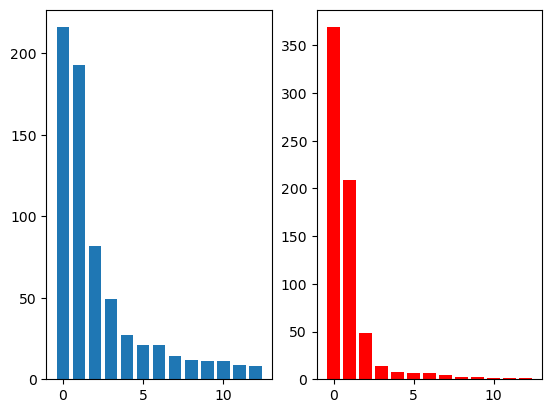

In [ ]:
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data


In [ ]:
clustering_2 = SC(n_clusters=4, n_components=4, affinity='nearest_neighbors').fit(A)
# try with 4 groups as in 3 main parties and one for the other
result = clustering_2.labels_
result

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 3, 0, 1, 0, 1, 1, 1,
       0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 3, 1, 1, 0, 1, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 2, 2, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 3, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1, 1, 1, 2, 1, 0,
       1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 0, 0, 0, 1, 1, 3, 1, 1, 2, 0, 3, 1, 2, 2, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 3, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 3, 1, 1, 1, 1, 0, 0, 1, 2, 3, 2, 3, 3, 1, 0, 1, 1, 2,
       3, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 3, 0, 3, 3, 1, 0, 1, 1, 2, 1, 2, 1, 1, 3, 1, 3, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 3, 1, 1, 1, 0, 3, 3, 3, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 0, 2, 1, 1,

<BarContainer object of 13 artists>

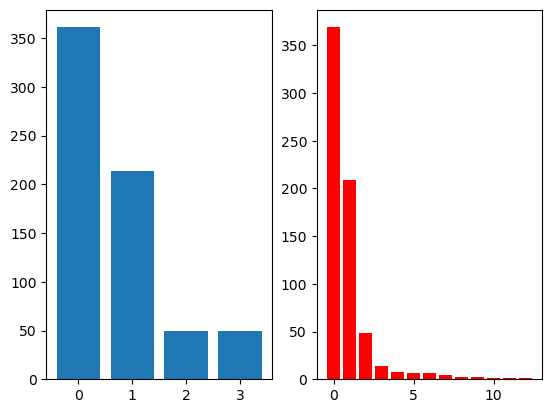

In [ ]:
hei = []
index = [n for n in range(4)]
result_l = list(result)

plt.subplot(1,2,1)
for n in range(4):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

#this give us really close approximation

### start to use svd for clustering

In [ ]:
clustering = SC(n_clusters=13, n_components=13, affinity='nearest_neighbors').fit(X)
# we instead work on X
result = clustering.labels_
rand_score(t_labels_l, result)

0.7096529556747986

<BarContainer object of 13 artists>

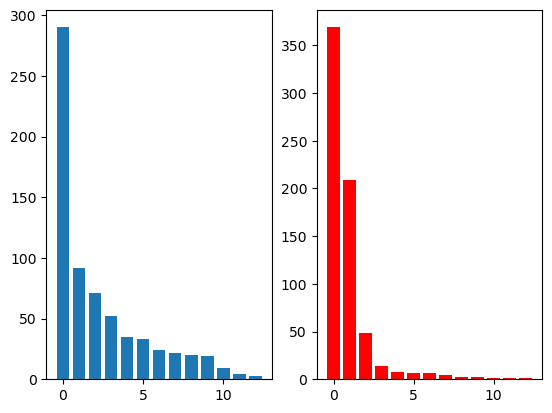

In [ ]:
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

In [ ]:
clustering = SC(n_clusters=4, n_components=4, affinity='nearest_neighbors').fit(X)
# we instead work on X
result = clustering.labels_
X.shape

(674, 600)

<BarContainer object of 13 artists>

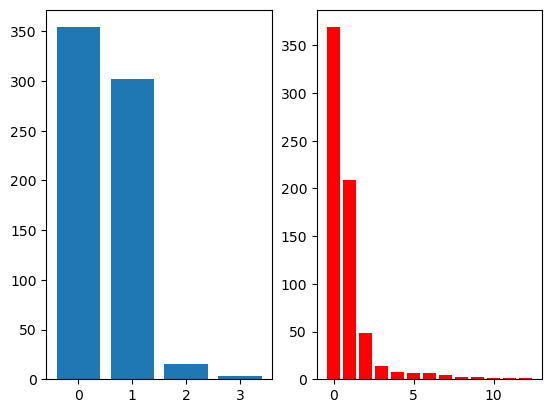

In [ ]:
hei = []
index = [n for n in range(4)]
result_l = list(result)

plt.subplot(1,2,1)
for n in range(4):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red')

### use the truncated data instead

### try to obtain a mark for clustering in Spectal



In [ ]:
result = SC(n_clusters=4, n_components=4, affinity='nearest_neighbors').fit_predict(A)
# use nearest_nei to construct the weighted matrix


[361, 214, 50, 49]

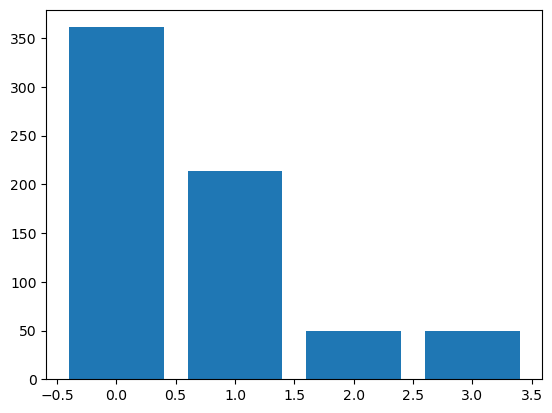

In [ ]:
hei = []
index = [n for n in range(4)]
result = list(result)

for n in range(4):
    hei.append(result.count(n))
plt.bar(index, hei)
hei

In [ ]:
t_labels_moded = [] # change the labels so that the other small parties are labeled as 3
for a in t_labels:
    if a <= 2:
        t_labels_moded.append(a)
    else:
        t_labels_moded.append(3)
hei_r = []
for n in range(4):
    hei_r.append(t_labels_moded.count(n))

hei_r

[369, 209, 49, 47]

In [ ]:
#assume the value in approx just the default sequence of labels
"""for n in range(len(result)):
    if result[n] == 2:
        result[n] = 1
    elif result[n] == 1:
        result[n] = 3
    elif result[n] == 3:
        result[n] = 3

# use MSE to obtain a score
MSE(t_labels_moded, result)"""

'for n in range(len(result)):\n    if result[n] == 2:\n        result[n] = 1\n    elif result[n] == 1:\n        result[n] = 3\n    elif result[n] == 3:\n        result[n] = 3\n\n# use MSE to obtain a score\nMSE(t_labels_moded, result)'

In [ ]:
rand_score(t_labels_l, result)

0.9548370598013236

In [ ]:
result = SC(n_clusters=4, n_components=4, affinity='nearest_neighbors').fit_predict(X)
rand_score(t_labels_l, result) # lower score using embedded method

0.7410196604071411

## 3. GMM

In [ ]:
result = Gauss(n_components=13, random_state=100, covariance_type='full').fit_predict(X)
rand_score(t_labels_l, result) # good result using GMM

0.8360721513573574

<BarContainer object of 13 artists>

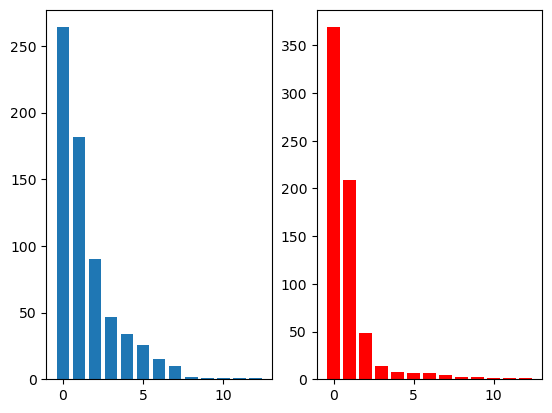

In [ ]:
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

In [ ]:
result = Gauss(n_components=4, random_state=200, covariance_type='full').fit_predict(X)
result # 4 clusters instead 

array([1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 3, 3, 0, 3, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 3, 0, 1, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1,
       0, 3, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 3, 1, 1, 1, 0, 0, 1, 0, 0, 3, 1, 1, 0, 3, 3, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 3, 1, 3, 1, 0, 0, 1, 0, 0, 3,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 3, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 0,

[369, 241, 14, 50]

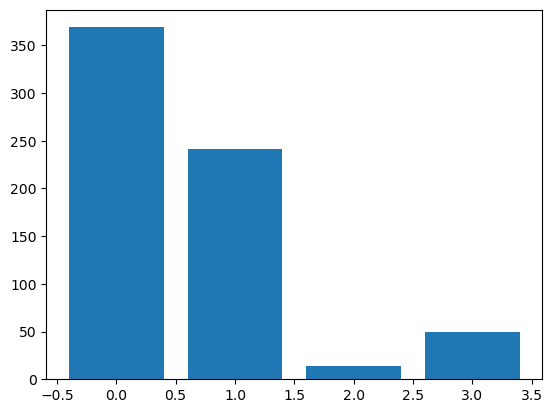

In [ ]:
hei = []
index = [n for n in range(4)]
result = list(result)

for n in range(4):
    hei.append(result.count(n))
plt.bar(index, hei)
hei

### Raw again?

In [ ]:
result = Gauss(n_components=13, random_state=200, covariance_type='full').fit_predict(A)
result

array([ 1,  6,  0,  0,  8,  0,  0,  6,  6,  7,  1,  6, 11,  6,  0,  0,  0,
        8,  6,  0,  6,  0,  0,  7,  0,  7,  0,  0,  8,  0,  8,  7, 12,  6,
        7,  0,  6,  3,  6,  0,  6,  0,  0,  7,  6,  0,  5, 12,  8, 12,  6,
        6,  7,  8, 12,  7,  0,  1,  7,  7,  6, 10,  3,  7,  6,  0,  8,  8,
        0,  0, 12, 11,  6,  6, 12,  0,  0,  6,  0,  6,  7,  0,  6,  7,  0,
        1,  6,  6,  6,  0,  5, 12,  6,  9,  6,  4,  0,  0,  0,  8,  0,  0,
        4,  6, 12,  6, 12,  7, 10,  0,  0,  1,  7,  0,  0,  0, 11,  8,  0,
        0,  0,  1,  4,  6,  3,  1,  0,  0,  0, 12,  7,  1,  7, 12,  6,  0,
        0,  6,  6,  6,  6,  6,  3,  0,  4,  6,  6,  0,  0,  0,  0, 10,  6,
       11,  0, 12,  6,  6,  6,  0,  0,  3,  8,  7, 12,  6,  9,  0, 12,  5,
       11,  0,  6,  6,  7,  8,  8,  1,  0,  7,  6,  8,  8,  0,  6,  6,  4,
        0,  4,  0,  3,  6,  6,  0,  7,  6,  0,  6,  6,  0,  6,  0,  3,  0,
        0,  0,  0,  4,  4,  0, 12,  3, 12,  3, 10,  0,  6,  0,  0, 12,  3,
        7,  0,  6,  7,  6

<BarContainer object of 13 artists>

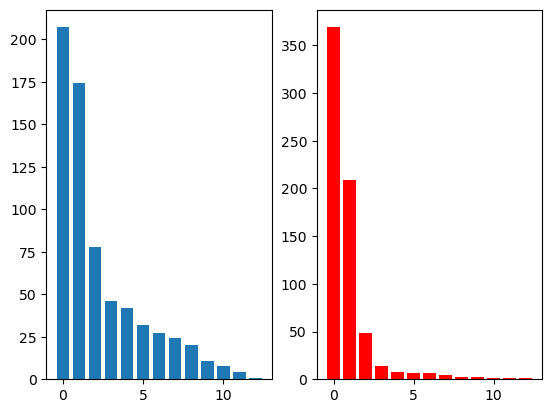

In [ ]:
# in terms of raw data it does not seem better than the svd 
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

In [ ]:
result = Gauss(n_components=4, random_state=200, covariance_type='full').fit_predict(A)
result

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 0, 3, 3, 0, 3, 1, 1, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 3, 2, 1, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 3, 3, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 3, 0, 1,
       0, 3, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 3, 1, 1, 1, 0, 0, 2, 0, 0, 3, 1, 2, 0, 3, 3, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 3, 2, 3, 2, 2, 0, 1, 0, 0, 3,
       2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3,
       0, 2, 1, 2, 2, 0, 1, 0, 0, 3, 0, 3, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 3, 0, 0,

[355, 216, 53, 50]

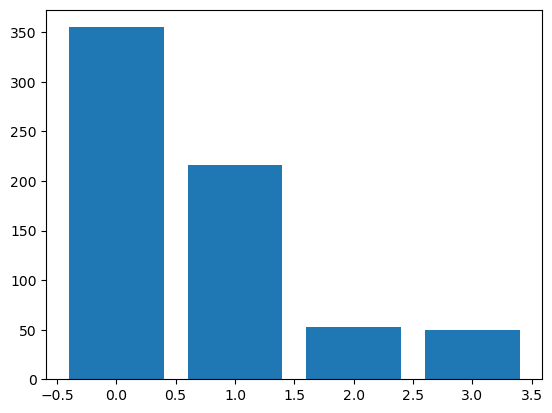

In [ ]:
hei = []
index = [n for n in range(4)]
result = list(result)

for n in range(4):
    hei.append(result.count(n))
plt.bar(index, hei)
hei # seems like good result

## 4. affinity progagation 

In [ ]:
examplar

{'con': 174,
 'lab': 1,
 'snp': 32,
 'pc': 659,
 'SDLP': 186,
 'Alba': 280,
 'LDem': 95,
 'DUP': 391,
 'SF': 62,
 'Independent': 212,
 'SPK': 319,
 'Green': 400,
 'Alliance': 208}

In [ ]:
# try to find examplars
exam = np.zeros(674)
exam -= 3
for a in examplar:
    exam[examplar[a]] = -1

In [ ]:
result = AP(max_iter=340).fit_predict(X)

/Users/eliashanlm/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [ ]:
max(result)

27

<BarContainer object of 13 artists>

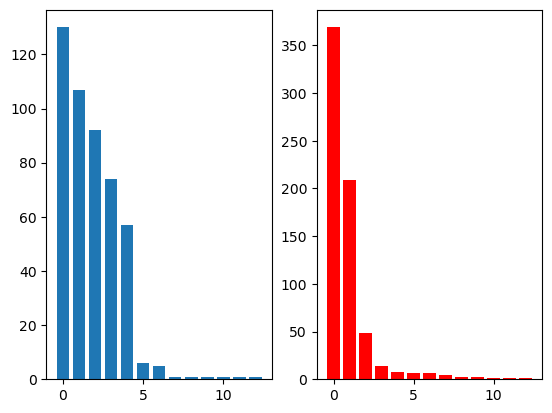

In [ ]:
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)

plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

In [ ]:
result = AP(preference=exam).fit_predict(X)
print(max(result))


657


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<BarContainer object of 13 artists>

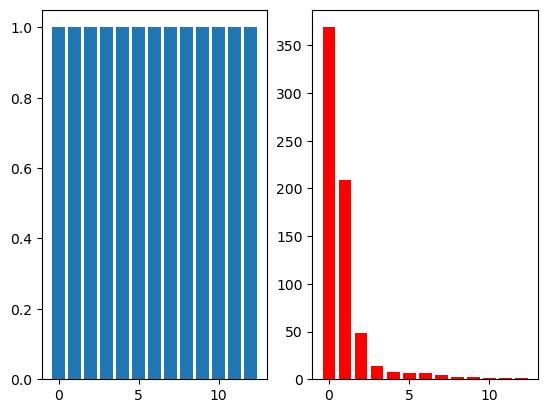

In [ ]:
hei = []
index = [n for n in range(13)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(13):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)
print(hei)
plt.subplot(1,2,2)
hei = []
index = [n for n in range(13)]
t_labels_l = list(t_labels)
for n in range(13):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

In [ ]:
eps = np.array(range(1,40))
eps = eps*0.1

In [ ]:
index = 0
while max(result) > 14:
    result = DBSCAN(eps[index]).fit_predict(X)
    index += 1 

## Redo in truncate 2d

In [ ]:
U, S, Vh = svd(A_1, 2) # not sure 600 is a good number 
S = np.diag(S)
X_1 = U@S**(0.5)

0.8139871532303109


Text(0.5, 1.0, 'clustering out of Spectal')

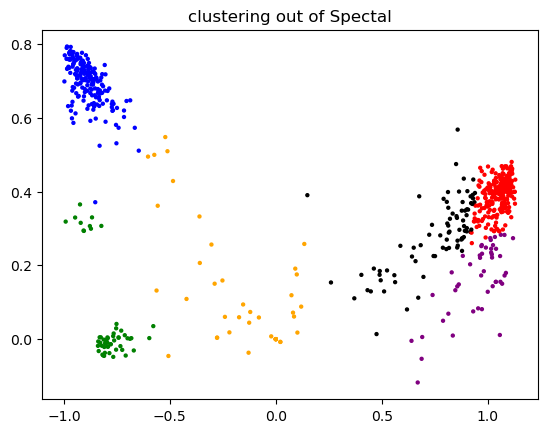

In [ ]:
result = SC(n_clusters=6, n_components = 6, random_state=100).fit_predict(X_1) #significantly imporve even in the 2 dimentional case
print(rand_score(t_labels_1, result))

color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]
plt.scatter(X_1[:,0], X_1[:,1], c = lable_color, s=4.5)
plt.title('clustering out of Spectal')

[240, 193, 80, 54, 47, 42]


<BarContainer object of 6 artists>

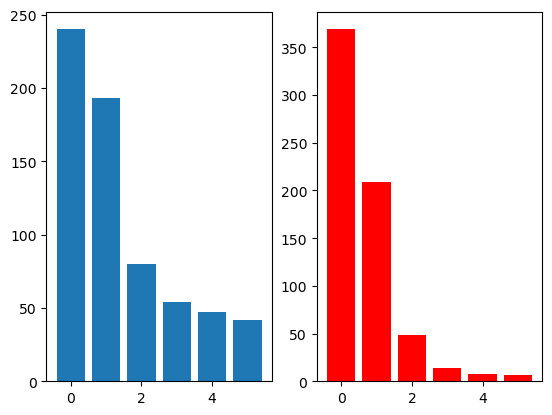

In [ ]:
hei = []
index = [n for n in range(6)]
result_l = list(result)
plt.subplot(1,2,1)
for n in range(6):
    hei.append(result_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei)
print(hei)
plt.subplot(1,2,2)
hei = []
index = [n for n in range(6)]
t_labels_l = list(t_labels_1)
for n in range(6):
    hei.append(t_labels_l.count(n))
    hei.sort(reverse=True)
plt.bar(index, hei, color = 'red') #red one are for real data

0.7897458573822379


Text(0.5, 1.0, 'clustering out of Spectal')

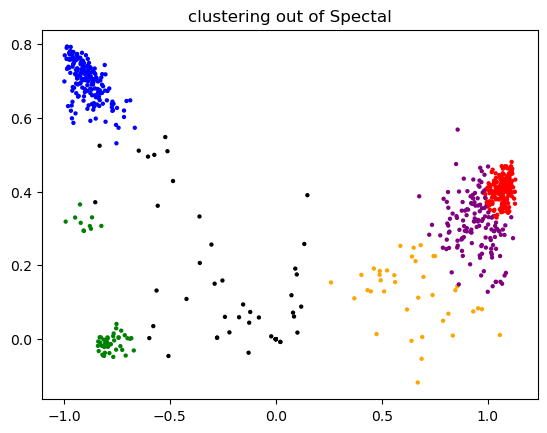

In [ ]:
result = Gauss( n_components = 6, random_state=100).fit_predict(X_1) #significantly imporve even in the 2 dimentional case
print(rand_score(t_labels_1, result))

color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]
plt.scatter(X_1[:,0], X_1[:,1], c = lable_color, s=4.5)
plt.title('clustering out of Spectal')

In [29]:
U, S, Vh = svd(A_1, 5) # not sure 600 is a good number 
S = np.diag(S)
X_2 = U@S**(0.5)

0.8671569540122882


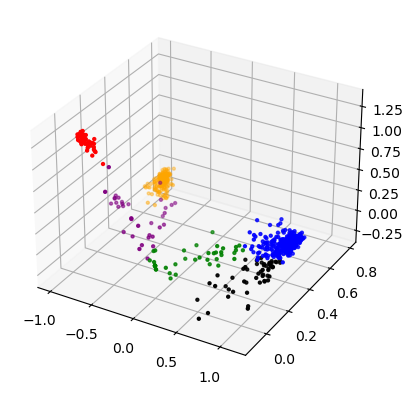

In [ ]:
result = SC(n_clusters=6, n_components = 6, random_state=100).fit_predict(X_2) #significantly imporve even in the 2 dimentional case
print(rand_score(t_labels_1, result))

color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
lable_color = [color[i] for i in result]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_2[:,0], X_2[:,1], X_2[:,2], c = lable_color, s = 4.5)

In [30]:
def spherical_transform(X): #X is our nxm embed-ment matrix, n MPs and latent dimension m
    (a,b) = X.shape
    X1 = np.zeros((a, b-1)) #creating the new matrix that will have the spherical latent coordinates
    for i in range(a): 
        if X[i, 0] >= 0:
            X1[i, 0] = np.arccos((X[i, 1]) / np.linalg.norm(X[i, :2]))
        else:
            X1[i, 0] = 2*np.pi - np.arccos((X[i, 1]) / np.linalg.norm(X[i, :2]))
        for j in range(1, b-1):
            X1[i, j] = 2*np.arccos((X[i, j+1]) / np.linalg.norm(X[i, :(j+2)]))
    return X1

spherical_X_2 = spherical_transform(X_2)


result = SC(n_clusters=5, n_components = 5, random_state=100).fit_predict(spherical_X_2) #significantly imporve even in the 2 dimentional case
# find_clustering_mistakes(t_labels_1,result)
rand_score(t_labels_1, result)

0.9813150335749206

In [ ]:
P = np.zeros((4, 3))

In [ ]:
P

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
for i in P[1, 2:]:
    print(i)

0.0
